In [ ]:
import sys
import platform
import tensorflow as tf

print("Python version:", sys.version)
print("Platform:", platform.platform())
print("TensorFlow version:", tf.__version__)


Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Platform: Linux-6.6.105+-x86_64-with-glibc2.35
TensorFlow version: 2.19.0


In [ ]:
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!pip install -q matplotlib scikit-learn pillow


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sareddylokeshreddy","key":"efdc056a6108a6e60b568e15c02ce1f1"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list | head


ref                                                              title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                         Heart Disease                                          3491  2025-12-11 15:29:14.327000           2114        110  1.0              
neurocipher/student-performance                                  Student Performance                                   49705  2025-12-12 12:06:28.973000           1261         83  1.0              
wardabilal/spotify-global-music-dataset-20092025                 Spotify Global Music Dataset (2009–2025)            1289021  2025-11-11 09:43:05.933000          16387        449  1.0              
kundanbedm

In [ ]:
!kaggle datasets download -d alessiocorrado99/animals10


Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
 94% 550M/586M [00:10<00:01, 32.0MB/s]
100% 586M/586M [00:10<00:00, 57.5MB/s]


In [ ]:
!unzip animals10.zip -d raw_data


Streaming output truncated to the last 5000 lines.
  inflating: raw_data/raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw_data/raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw_data/raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw_data/raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw_data/raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw_data/raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw_data/raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw_data/raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw_data/raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw_data/raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw_data/raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw_data/raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw_data/raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00E

In [ ]:
import os
import shutil

SOURCE_DIR = "raw_data/raw-img"
TARGET_DIR = "dataset"

classes = {
    "cat": "cats",
    "dog": "dogs",
    "horse": "horses"
}

os.makedirs(TARGET_DIR, exist_ok=True)

MAX_IMAGES = 500  # engineer decision

for src, dst in classes.items():
    src_path = os.path.join(SOURCE_DIR, src)
    dst_path = os.path.join(TARGET_DIR, dst)
    os.makedirs(dst_path, exist_ok=True)

    images = os.listdir(src_path)[:MAX_IMAGES]
    for img in images:
        shutil.copy(os.path.join(src_path, img), dst_path)

print("✅ Dataset prepared automatically")


FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/raw-img/cat'

In [ ]:
import os

print(os.listdir("raw_data"))
print(os.listdir("raw_data/raw-img"))


['translate.py', 'raw-img']
['scoiattolo', 'farfalla', 'gallina', 'elefante', 'cavallo', 'gatto', 'mucca', 'cane', 'pecora', 'ragno']


In [ ]:
import os
import shutil

SOURCE_DIR = "raw_data/raw-img"
TARGET_DIR = "dataset"

# Correct class mapping (Italian → English)
classes = {
    "gatto": "cats",
    "cane": "dogs",
    "cavallo": "horses"
}

os.makedirs(TARGET_DIR, exist_ok=True)

MAX_IMAGES = 500  # ML engineer decision

for src, dst in classes.items():
    src_path = os.path.join(SOURCE_DIR, src)
    dst_path = os.path.join(TARGET_DIR, dst)
    os.makedirs(dst_path, exist_ok=True)

    images = os.listdir(src_path)[:MAX_IMAGES]
    for img in images:
        shutil.copy(os.path.join(src_path, img), dst_path)

print("✅ Dataset prepared automatically using Kaggle API")


✅ Dataset prepared automatically using Kaggle API


In [ ]:
for cls in ["cats", "dogs", "horses"]:
    print(cls, ":", len(os.listdir(f"dataset/{cls}")))


cats : 500
dogs : 500
horses : 500


In [ ]:
import os

BASE_DIR = "dataset"

for cls in os.listdir(BASE_DIR):
    cls_path = os.path.join(BASE_DIR, cls)
    print(cls, "->", len(os.listdir(cls_path)), "images")


cats -> 500 images
horses -> 500 images
dogs -> 500 images


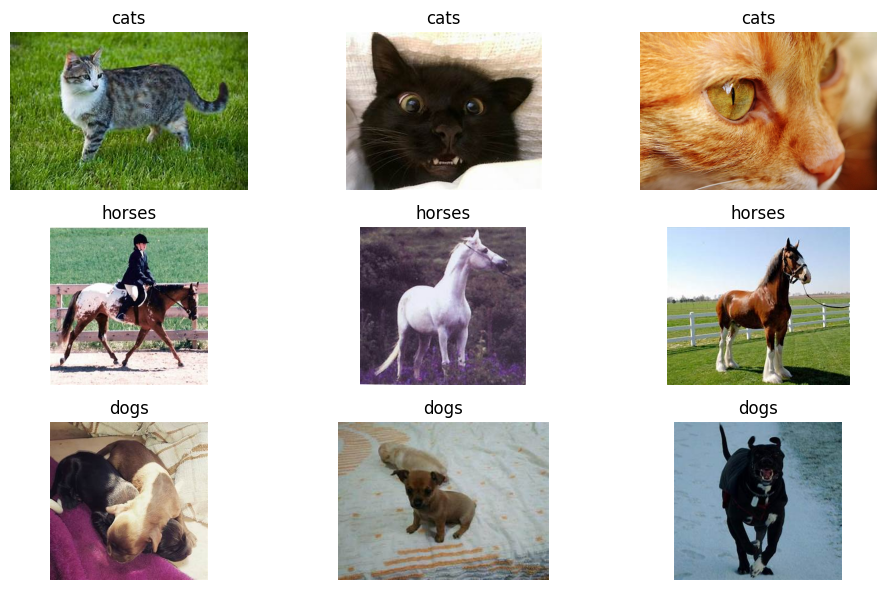

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random

def show_sample_images(base_dir, samples_per_class=3):
    plt.figure(figsize=(10, 6))
    idx = 1

    for cls in os.listdir(base_dir):
        cls_path = os.path.join(base_dir, cls)
        images = random.sample(os.listdir(cls_path), samples_per_class)

        for img in images:
            plt.subplot(len(os.listdir(base_dir)), samples_per_class, idx)
            img_path = os.path.join(cls_path, img)
            image = Image.open(img_path)
            plt.imshow(image)
            plt.title(cls)
            plt.axis("off")
            idx += 1

    plt.tight_layout()
    plt.show()

show_sample_images(BASE_DIR)


In [ ]:
from collections import Counter

sizes = []

for cls in os.listdir(BASE_DIR):
    cls_path = os.path.join(BASE_DIR, cls)
    for img in os.listdir(cls_path)[:100]:  # sample for speed
        img_path = os.path.join(cls_path, img)
        image = Image.open(img_path)
        sizes.append(image.size)

Counter(sizes).most_common(5)


[((300, 225), 45),
 ((300, 200), 26),
 ((300, 300), 15),
 ((300, 240), 11),
 ((300, 169), 11)]

In [ ]:
def find_corrupted_images(base_dir):
    corrupted = []
    for cls in os.listdir(base_dir):
        cls_path = os.path.join(base_dir, cls)
        for img in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img)
            try:
                Image.open(img_path).verify()
            except:
                corrupted.append(img_path)
    return corrupted

corrupted_images = find_corrupted_images(BASE_DIR)
print("Corrupted images found:", len(corrupted_images))


Corrupted images found: 0


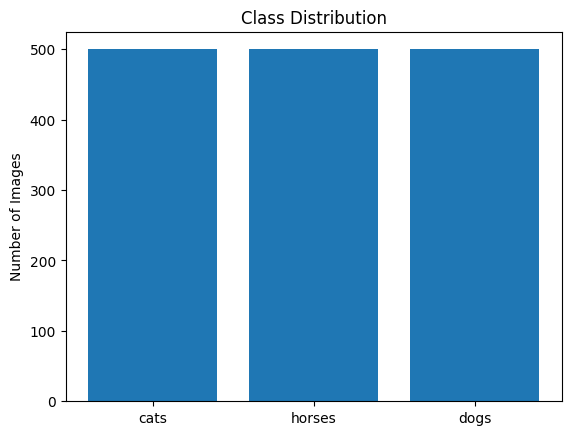

In [ ]:
import matplotlib.pyplot as plt

class_counts = {
    cls: len(os.listdir(os.path.join(BASE_DIR, cls)))
    for cls in os.listdir(BASE_DIR)
}

plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()


In [ ]:
# Global configuration
IMAGE_SIZE = (224, 224)   # standard for many pretrained CNNs
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
SEED = 42

DATASET_DIR = "dataset"

print("Config loaded")


Config loaded


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=VALIDATION_SPLIT,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Validation data generator (NO augmentation)
val_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=VALIDATION_SPLIT
)

print("ImageDataGenerators created")


ImageDataGenerators created


In [ ]:
train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED
)


Found 1200 images belonging to 3 classes.


In [ ]:
val_generator = val_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)


Found 300 images belonging to 3 classes.


In [ ]:
print("Class indices:")
train_generator.class_indices


Class indices:


{'cats': 0, 'dogs': 1, 'horses': 2}

In [ ]:
images, labels = next(train_generator)

print("Image batch shape:", images.shape)
print("Label batch shape:", labels.shape)


Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 3)


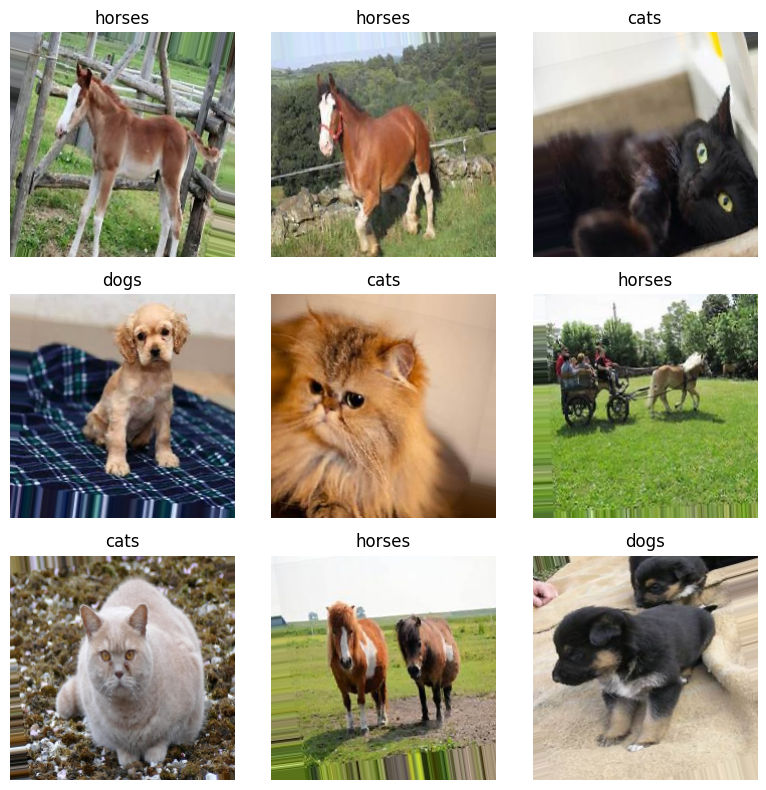

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models


In [ ]:
# Load pretrained MobileNetV2 (without top layers)
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model (very important)
base_model.trainable = False

print("Base model loaded and frozen")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Base model loaded and frozen


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(3, activation="softmax")  # 3 classes
])

print("Custom model built")


Custom model built


In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Model compiled successfully")


Model compiled successfully


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,427,459 (9.26 MB)

 Trainable params: 166,915 (652.01 KB)

 Non-trainable params: 2,260,544 (8.62 MB)

In [ ]:
EPOCHS = 15

steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = val_generator.samples // BATCH_SIZE

print("Steps per epoch:", steps_per_epoch)
print("Validation steps:", validation_steps)


Steps per epoch: 37
Validation steps: 9


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor="val_loss",
    save_best_only=True
)

print("Callbacks configured")


Callbacks configured


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 716ms/step - accuracy: 0.9788 - loss: 0.0469 - val_accuracy: 0.9700 - val_loss: 0.0930
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 426ms/step - accuracy: 0.9829 - loss: 0.0413 - val_accuracy: 0.9667 - val_loss: 0.0987
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 456ms/step - accuracy: 0.9841 - loss: 0.0425 - val_accuracy: 0.9600 - val_loss: 0.1202
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 439ms/step - accuracy: 0.9763 - loss: 0.0540 - val_accuracy: 0.9600 - val_loss: 0.1255
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 433ms/step - accuracy: 0.9924 - loss: 0.0249 - val_accuracy: 0.9633 - val_loss: 0.1091
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 456ms/step - accuracy: 0.9868 - loss: 0.0351 - val_accuracy: 0.9733 - val_loss: 0.1081


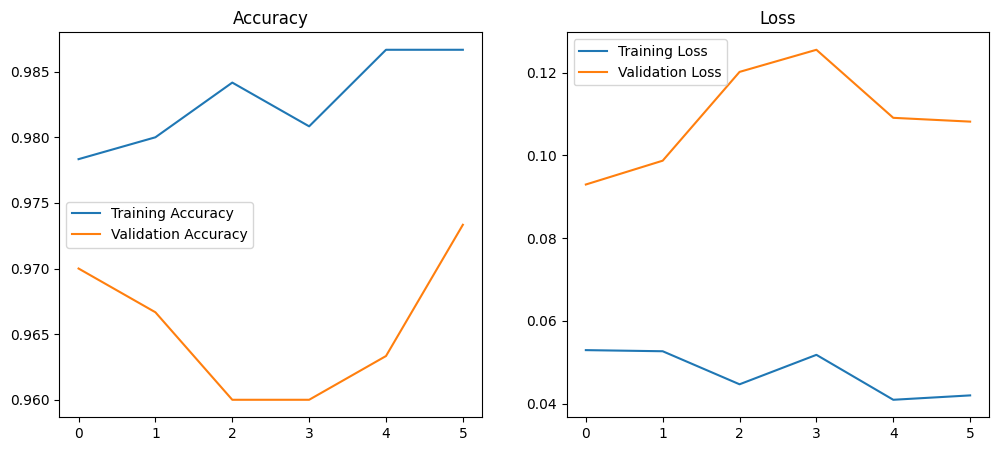

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1, 2, 2)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()


In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9644 - loss: 0.1175
Validation Accuracy: 97.00%
Validation Loss: 0.0930


In [ ]:
model.save("image_classifier.keras")
print("Model saved successfully")


Model saved successfully


In [ ]:
import tensorflow as tf

MODEL_PATH = "image_classifier.keras"

model = tf.keras.models.load_model(MODEL_PATH)
print("Model loaded successfully")


Model loaded successfully


In [ ]:
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)


Class names: ['cats', 'dogs', 'horses']


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def predict_image(image_path, model, class_names):
    # Load and preprocess image
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    predictions = model.predict(img_array)[0]

    # Results
    for cls, prob in zip(class_names, predictions):
        print(f"{cls}: {prob*100:.2f}%")

    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    print("\nFINAL RESULT:", predicted_class)
    print(f"Confidence: {confidence:.2f}%")

    # Display image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{predicted_class} ({confidence:.2f}%)")
    plt.show()


In [ ]:
!wget -q https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg -O test_cat.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
cats: 100.00%
dogs: 0.00%
horses: 0.00%

FINAL RESULT: cats
Confidence: 100.00%


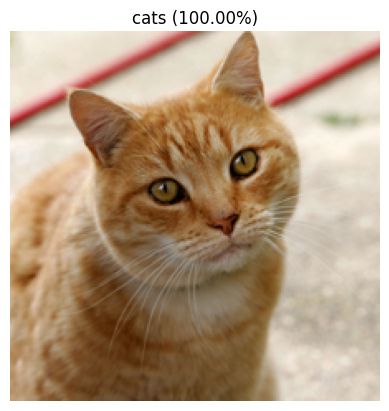

In [ ]:
predict_image("test_cat.jpg", model, class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
cats: 11.24%
dogs: 88.18%
horses: 0.58%

FINAL RESULT: dogs
Confidence: 88.18%


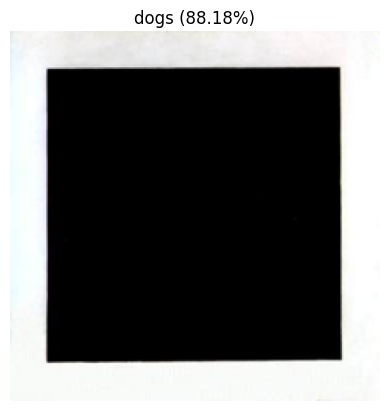

In [ ]:
!wget -q https://upload.wikimedia.org/wikipedia/commons/9/99/Black_square.jpg -O random.jpg
predict_image("random.jpg", model, class_names)


In [ ]:
!wget -q https://upload.wikimedia.org/wikipedia/commons/5/5a/Horse_in_pasture.jpg -O test_image.jpg


In [ ]:
predict_image("test_image.jpg", model, class_names)



UnidentifiedImageError: cannot identify image file 'test_image.jpg'

In [ ]:
import os

print("File exists:", os.path.exists("test_image.jpg"))
print("File size (bytes):", os.path.getsize("test_image.jpg"))


File exists: True
File size (bytes): 0


In [ ]:
!rm test_image.jpg


In [ ]:
!wget -O test_image.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Horse_in_pasture.jpg/640px-Horse_in_pasture.jpg



--2025-12-28 05:27:58--  https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Horse_in_pasture.jpg/640px-Horse_in_pasture.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 429 Use thumbnail steps listed on https://w.wiki/GHai. Please contact noc@wikimedia.org for further information (a765913)
2025-12-28 05:27:58 ERROR 429: Use thumbnail steps listed on https://w.wiki/GHai. Please contact noc@wikimedia.org for further information (a765913).



In [ ]:
import os
print("File size:", os.path.getsize("test_image.jpg"))


File size: 0


In [ ]:
!rm -f test_horse.jpg
!curl -L https://storage.googleapis.com/download.tensorflow.org/example_images/horse.jpg -o test_horse.jpg


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   298  100   298    0     0   1245      0 --:--:-- --:--:-- --:--:--  1246


In [ ]:
predict_image("test_horse.jpg", model, class_names)


UnidentifiedImageError: cannot identify image file 'test_horse.jpg'

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def predict_image_from_url(image_url, model, class_names):
    # Load image directly from URL (no file system)
    img = tf.keras.utils.load_img(
        image_url,
        target_size=(224, 224)
    )

    img_array = tf.keras.utils.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    predictions = model.predict(img_array)[0]

    print("RAW PROBABILITIES:")
    for cls, prob in zip(class_names, predictions):
        print(f"{cls}: {prob*100:.2f}%")

    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    print("\nFINAL RESULT:", predicted_class)
    print(f"Confidence: {confidence:.2f}%")

    # Display image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{predicted_class} ({confidence:.2f}%)")
    plt.show()


In [ ]:
horse_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/horse.jpg"

predict_image_from_url(horse_url, model, class_names)


FileNotFoundError: [Errno 2] No such file or directory: 'https://storage.googleapis.com/download.tensorflow.org/example_images/horse.jpg'

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def predict_image_from_url(image_url, model, class_names):
    # Download image safely using TensorFlow utility
    image_path = tf.keras.utils.get_file(
        origin=image_url,
        fname="temp_image.jpg"
    )

    # Load and preprocess image
    img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    predictions = model.predict(img_array)[0]

    print("RAW PROBABILITIES:")
    for cls, prob in zip(class_names, predictions):
        print(f"{cls}: {prob*100:.2f}%")

    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    print("\nFINAL RESULT:", predicted_class)
    print(f"Confidence: {confidence:.2f}%")

    # Display image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{predicted_class} ({confidence:.2f}%)")
    plt.show()


In [ ]:
horse_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/horse.jpg"
predict_image_from_url(horse_url, model, class_names)


Exception: URL fetch failure on https://storage.googleapis.com/download.tensorflow.org/example_images/horse.jpg: 403 -- Forbidden

In [ ]:
import os
import random

HORSE_DIR = "dataset/horses"

# Pick a random horse image
horse_image = random.choice(os.listdir(HORSE_DIR))
horse_image_path = os.path.join(HORSE_DIR, horse_image)

horse_image_path


'dataset/horses/OIP-8dvWKKuRJd8UdX1YBh4aSwHaLh.jpeg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
cats: 0.14%
dogs: 0.10%
horses: 99.76%

FINAL RESULT: horses
Confidence: 99.76%


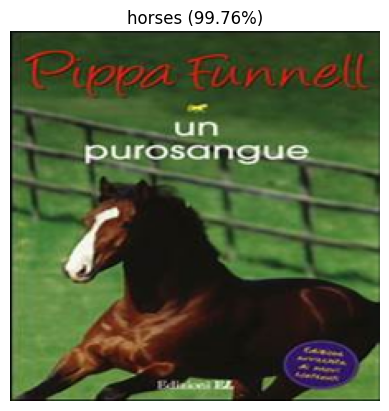

In [ ]:
predict_image(horse_image_path, model, class_names)


In [ ]:
from google.colab import files
files.upload()


Saving sample.jpg to sample.jpg


{'sample.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x12\x12\x15\x12\x13\x12\x16\x16\x15\x17\x17\x15\x15\x17\x15\x16\x15\x15\x17\x16\x15\x15\x15\x17\x16\x17\x15\x16\x15\x15\x18\x1d( \x18\x1a%\x1b\x15\x17"1!%*+...\x17 383-7(-/+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1a0%\x1f%/--/----------------------------------------------\xff\xc0\x00\x11\x08\x00\xe0\x00\xe1\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x01\x02\x04\x05\x06\x00\x07\x08\xff\xc4\x008\x10\x00\x01\x03\x02\x04\x03\x06\x05\x03\x04\x03\x00\x03\x00\x00\x00\x01\x00\x02\x11\x03!\x04\x121A\x05Qa\x06\x13"q\x81\x91\x142\xa1\xb1\xf0R\xc1\xd1#Bb\xe1r\x92\xf1\x07\x15c\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xc4\x00%\x11\x00\x02\x02\x03\x00\x01\x05\x01\x00\x03\x01\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03\x12!1\x04\x13"AQaB\x81\x

In [ ]:
predict_image("uploaded_image.jpg", model, class_names)


FileNotFoundError: [Errno 2] No such file or directory: 'uploaded_image.jpg'

In [ ]:
from google.colab import files
files.upload()


Saving uploaded_image.jpg to uploaded_image.jpg


{'uploaded_image.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x12\x12\x15\x12\x13\x12\x16\x16\x15\x17\x17\x15\x15\x17\x15\x16\x15\x15\x17\x16\x15\x15\x15\x17\x16\x17\x15\x16\x15\x15\x18\x1d( \x18\x1a%\x1b\x15\x17"1!%*+...\x17 383-7(-/+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1a0%\x1f%/--/----------------------------------------------\xff\xc0\x00\x11\x08\x00\xe0\x00\xe1\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x01\x02\x04\x05\x06\x00\x07\x08\xff\xc4\x008\x10\x00\x01\x03\x02\x04\x03\x06\x05\x03\x04\x03\x00\x03\x00\x00\x00\x01\x00\x02\x11\x03!\x04\x121A\x05Qa\x06\x13"q\x81\x91\x142\xa1\xb1\xf0R\xc1\xd1#Bb\xe1r\x92\xf1\x07\x15c\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xc4\x00%\x11\x00\x02\x02\x03\x00\x01\x05\x01\x00\x03\x01\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03\x12!1\x04\x13"AQ

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
cats: 0.06%
dogs: 99.93%
horses: 0.01%

FINAL RESULT: dogs
Confidence: 99.93%


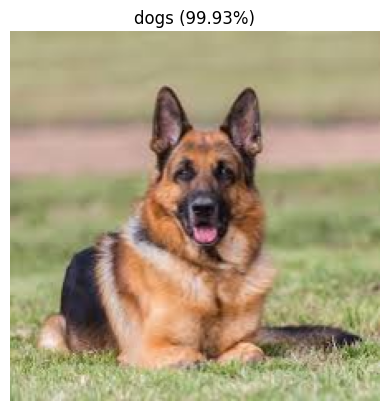

In [ ]:
predict_image("uploaded_image.jpg", model, class_names)


In [ ]:
import os

os.makedirs("model", exist_ok=True)
model.save("model/image_classifier.keras")

print("Model saved in model/ folder")


Model saved in model/ folder
